In [49]:
#Loading data and adding required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import requests
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import f_oneway
from scipy.stats import pearsonr

import io

URL ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'


response = requests.get(URL)
data = io.StringIO(response.content.decode('utf-8'))
boston_url = pd.read_csv(data, index_col=False)


In [50]:
# Explore the dataset
boston_url

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [51]:
# Generate descriptive statistics for the dataset
boston_url.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [52]:
#Generate descriptive statistics and visualizations
boston_url['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Statistics for the median value of owner-occupied homes (MEDV) in $1000s:
  - Number of observations: 506.0
  - Mean value: $22.53
  - Median value: $21.2
  - Standard deviation: $9.2
  - Minimum value: $5.0
  - Maximum value: $50.0


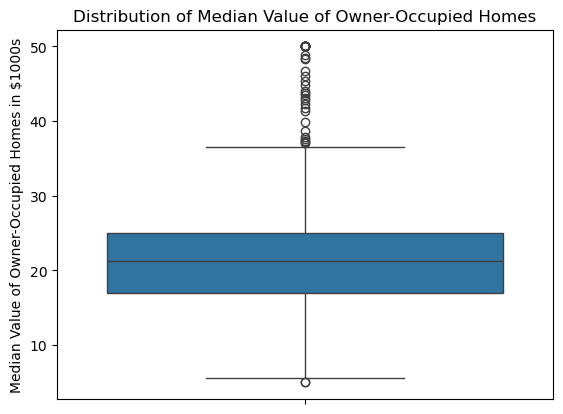

In [53]:
#1. Boxlot - Median value of owner-occupied-homes"
sns.boxplot(boston_url['MEDV'])
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.ylabel("Median Value of Owner-Occupied Homes in $1000s")
# Calculate descriptive statistics for the median value of owner-occupied homes (MEDV)
stats = boston_url['MEDV'].describe()

print(f"Statistics for the median value of owner-occupied homes (MEDV) in $1000s:")
print(f"  - Number of observations: {stats['count']}")
print(f"  - Mean value: ${round(stats['mean'],2)}")
print(f"  - Median value: ${round(stats['50%'],2)}")
print(f"  - Standard deviation: ${round(stats['std'],2)}")
print(f"  - Minimum value: ${round(stats['min'],2)}")
print(f"  - Maximum value: ${round(stats['max'],2)}")
plt.show()


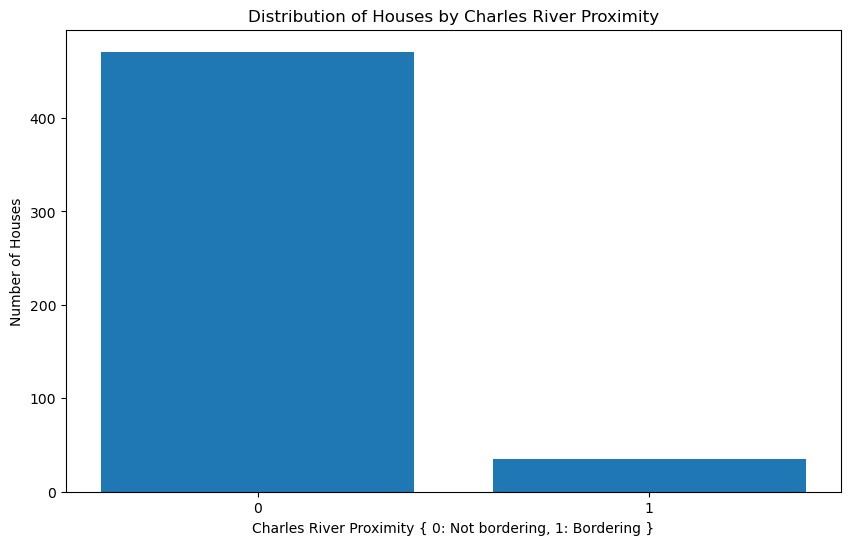


Number of houses not bordering the river: 471, and bordering: 35



In [54]:
#2. Bar plot for the Charles River
CHAS = boston_url['CHAS'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(['0','1'],CHAS.values)
plt.xlabel('Charles River Proximity { 0: Not bordering, 1: Bordering }')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Charles River Proximity')

plt.show()
print(f"\nNumber of houses not bordering the river: {CHAS[0]}, and bordering: {CHAS[1]}\n")



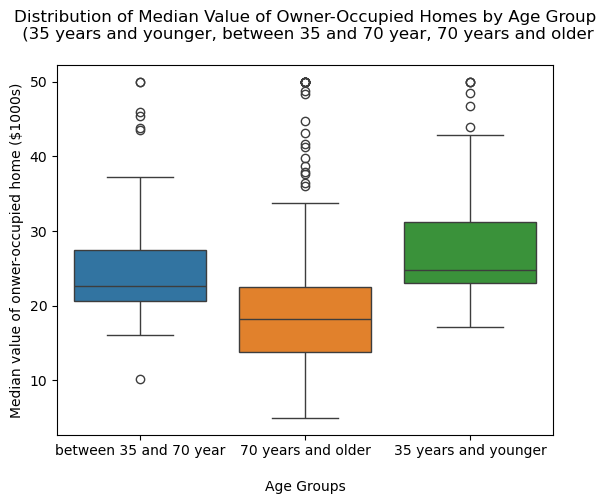

Statistics for the median value of owner-occupied homes (MEDV) in $1000s: for the Age groups

Group: 35 years and younger
count    91.000000
mean     27.775824
std       7.638198
min      17.100000
25%      23.050000
50%      24.800000
75%      31.150000
max      50.000000
Name: MEDV, dtype: float64


Group: 70 years and older
count    287.000000
mean      19.793380
std        9.515375
min        5.000000
25%       13.800000
50%       18.200000
75%       22.550000
max       50.000000
Name: MEDV, dtype: float64


Group: between 35 and 70 year
count    128.000000
mean      24.947656
std        6.969370
min       10.200000
25%       20.675000
50%       22.600000
75%       27.425000
max       50.000000
Name: MEDV, dtype: float64




In [55]:
#3. Boxplot for MED variable vs the Age variable
boxplotData = boston_url.copy()
#Create age group
boxplotData['Age_Group'] = np.where(boxplotData['AGE'] <=35,'35 years and younger', np.where((boxplotData['AGE'] >35) & (boxplotData['AGE'] <=70),'between 35 and 70 year','70 years and older'))

sns.boxplot(x='Age_Group', y='MEDV', data=boxplotData, hue='Age_Group')
plt.title('Distribution of Median Value of Owner-Occupied Homes by Age Group\n (35 years and younger, between 35 and 70 year, 70 years and older\n')
plt.ylabel("Median value of onwer-occupied home ($1000s)")
plt.xlabel('\nAge Groups')

plt.show()
info = boxplotData.groupby('Age_Group')['MEDV']
print("Statistics for the median value of owner-occupied homes (MEDV) in $1000s: for the Age groups\n")
for y, i in info:
    print(f"Group: {y}")
    print(i.describe())
    print("\n")



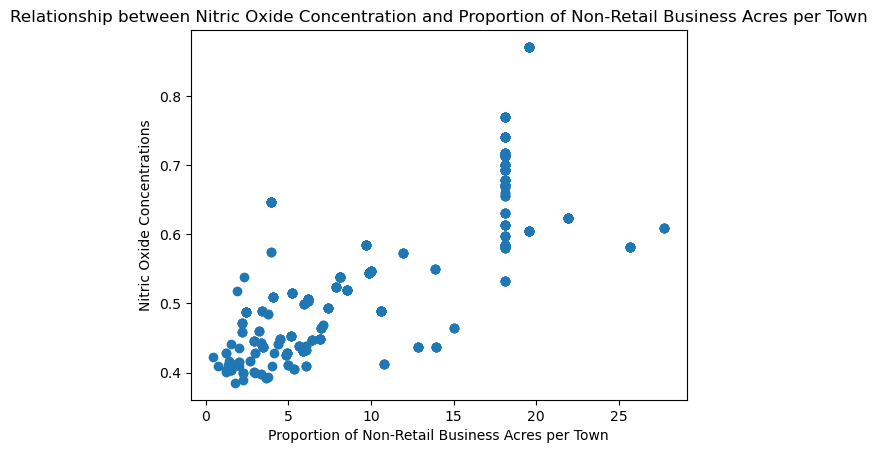

The correlation between Nitric oxide concentraions and the proportion of non-retail buisness acress per town is:

Strong linear correlation.


In [56]:
#4. Scatter plot show the relationship between Nitric oxide concentraions and the proportion of non-retail buisness acress per town.

plt.scatter(x='INDUS', y='NOX', data=boston_url)
plt.title('Relationship between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.show()
# Calculate and display Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(boston_url['INDUS'], boston_url['NOX'])
print("The correlation between Nitric oxide concentraions and the proportion of non-retail buisness acress per town is:\n") 
if abs(correlation_coefficient) >= 0.7:
    print("Strong linear correlation.")
elif 0.3 <= abs(correlation_coefficient) < 0.7:
    print("Moderate linear correlation.")
else:
    print("Weak or no linear correlation.")


We can see right-skewed distribution with a high frequency of observations around the value of 20.


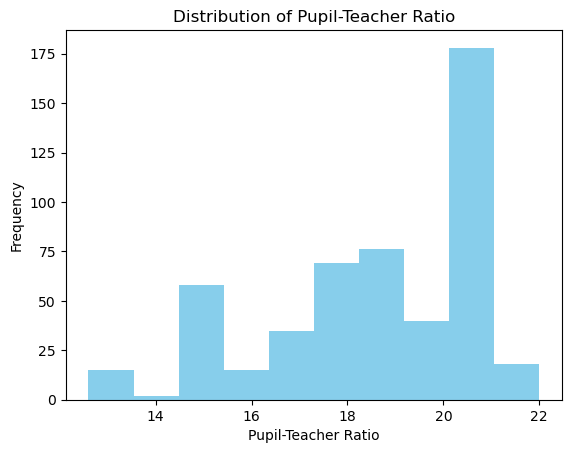

In [57]:
#5. Histogram for pupil to teacher ration.
plt.hist(boston_url['PTRATIO'], color='skyblue', bins=10)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
print("We can see right-skewed distribution with a high frequency of observations around the value of 20.")
plt.show()

In [58]:
#Required tests to answer question

In [59]:
#1. Is there a significant difference in median vale of houses bounded by the Charles river o not? 
#('T-test for indepenedt samples)

# We filter the data to separate homes located on the Charles River (CHAS=1) from the rest.
# We create two new data series:
# - 'no': Contains MEDV values (median home values) for homes NOT located on the Charles River.
# - 'yes': Contains MEDV values for homes located on the Charles River.

boston_url['CHAS']
no = boston_url[boston_url['CHAS'] == 0]['MEDV']
yes = boston_url[boston_url['CHAS'] == 1]['MEDV']


#Perform T-test
statistic, p_value = ttest_ind(no, yes, equal_var=False)
alpha = 0.05

print(f"Test statistic: {statistic}")
print(f"p-value:: {p_value}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")


Test statistic: -3.113291312794837
p-value:: 0.0035671700981375174
We reject the null hypothesis. There is a statistically significant difference between the two groups.


In [60]:
#2. Is there a difference ine Median valeu of houses (MEDV) for each proportion of woner occupied units buitl priror 1940 (AGE)? (Anova)


year = 2025  # Current year
prior_year = 1940  # Year to compare against

# Calculate the age threshold
test_year = year - prior_year 

# Filter the data based on the age threshold
after = boston_url[boston_url['AGE'] <= test_year]['MEDV']  # Houses built after 1940
before = boston_url[boston_url['AGE'] > test_year]['MEDV']  # Houses built before 1940 


#Perform ANOVA
statistic, p_value =f_oneway(after,before)
alpha = 0.05
print(f"ANOVA statistic: {statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference in the mean house prices between houses built before and after 1940.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in the mean house prices between houses built before and after 1940.")

ANOVA statistic: 70.12483576931422
p-value: 5.54639902780616e-16
We reject the null hypothesis. There is a statistically significant difference in the mean house prices between houses built before and after 1940.


In [61]:
#3. Can we conclude that there is no relationship betwwene Nitrix oxide concenration and proporiotn of non-reatil buisness acres per town? ( Pearson Corrletaion)


import pandas as pd


#Choosing the right data
x = boston_url['NOX']
y = boston_url['INDUS']

# Perform Pearson Corrletaion
correlation_coefficient, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

if abs(correlation_coefficient) >= 0.7:
    print("Strong linear correlation.")
elif 0.3 <= abs(correlation_coefficient) < 0.7:
    print("Moderate linear correlation.")
else:
    print("Weak or no linear correlation.")

Pearson correlation coefficient: 0.763651446920915
p-value: 7.913361061241167e-98
Strong linear correlation.


In [62]:
#what is the impact of an addtional weighted distance to the five Boston employment centres on the meadin value of owner occupied homes?

#Choosing the right data
x = boston_url['DIS']
y = boston_url['MEDV']

# Perform linear regression 
regression_result  = linregress(y,x)

slope= regression_result.slope
intercept=regression_result.intercept

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Interpretation
if slope < 0:
    print("An increase in weighted distance to employment centers is associated with a decrease in median house value.")
elif slope > 0:
    print("An increase in weighted distance to employment centers is associated with an increase in median house value.") 
else:
    print("There is no significant linear relationship between weighted distance and median house value.")

Slope: 0.05722208439742027
Intercept: 2.505668542558049
An increase in weighted distance to employment centers is associated with an increase in median house value.
